In [21]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [23]:
df_fake = pd.read_csv("C:/Users/koona/OneDrive/Pictures/JAYACHANDRA/fake_news_detection/Fake.csv")
df_real = pd.read_csv("C:/Users/koona/OneDrive/Pictures/JAYACHANDRA/fake_news_detection/True.csv")

In [24]:
df_fake['label'] = 0 
df_real['label'] = 1 

In [25]:
df = pd.concat([df_fake, df_real]).reset_index(drop=True)

In [26]:
df['content'] = df['title'].astype(str) + " " + df['text'].astype(str)

In [27]:
df = df[['content', 'label']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], 
    df['label'], 
    test_size=0.2, 
    random_state=42
)

In [29]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
y_pred = model.predict(X_test_tfidf)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9310690423162583
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4733
           1       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



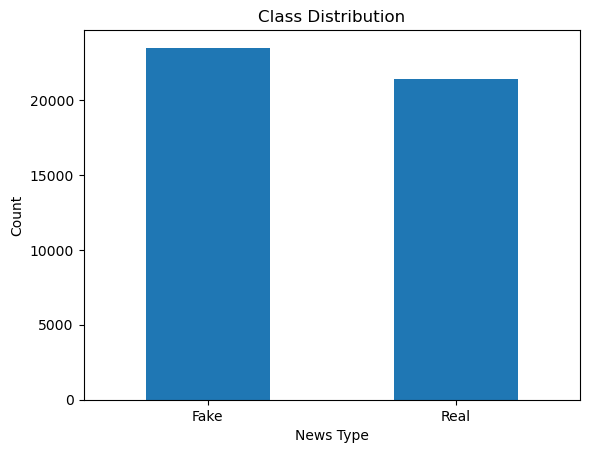

In [35]:
df['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()